<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#L'obiettivo" data-toc-modified-id="L'obiettivo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>L'obiettivo</a></span></li><li><span><a href="#Importare-i-dati" data-toc-modified-id="Importare-i-dati-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importare i dati</a></span></li><li><span><a href="#Preparazione-dei-dati" data-toc-modified-id="Preparazione-dei-dati-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparazione dei dati</a></span><ul class="toc-item"><li><span><a href="#Data-types" data-toc-modified-id="Data-types-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data types</a></span></li><li><span><a href="#Dati-mancanti" data-toc-modified-id="Dati-mancanti-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dati mancanti</a></span></li></ul></li><li><span><a href="#Separando-i-dati-per-la-validazione" data-toc-modified-id="Separando-i-dati-per-la-validazione-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Separando i dati per la validazione</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Xgboost" data-toc-modified-id="Xgboost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Xgboost</a></span></li></ul></li><li><span><a href="#Interpretabilità" data-toc-modified-id="Interpretabilità-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interpretabilità</a></span><ul class="toc-item"><li><span><a href="#Permutation-importance" data-toc-modified-id="Permutation-importance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Permutation importance</a></span></li><li><span><a href="#Partial-plots" data-toc-modified-id="Partial-plots-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Partial plots</a></span></li><li><span><a href="#Shap-values" data-toc-modified-id="Shap-values-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Shap values</a></span></li></ul></li></ul></div>

# L'obiettivo

Come primo passo, cerco di controllare se ci siano cambiamenti sostanziali fra i dati per il 2018 ed il 2019. Più precisamente, se possa costruire un modello di classificazione dove le classi sono "Appartiene al 2018" o "Appartiene al 2019" ([adversarial validation](http://manishbarnwal.com/blog/2017/02/15/introduction_to_adversarial_validation/)).

Se riesco a costruire un *buon* modello predittivo, significa che ci sono variazioni significative fra i due anni. Normalmente, escluderei le variabili che sono rilevanti per distinguere il 2018 dal 2019 in un modello addestrato (trained) per prevedere il 2019. Lo posso fare senza conoscere la variabile che voglio stimare per il 2019. 

Ma in questo caso, voglio trovare quali variabili permettono di distinguere il 2018 dal 2019 come strumento per sinteticamente descrivere le differenze fra 2018 e 2019.

# Importare i dati

Come primo passo, importo i dati per il 2018 ed il 2019 per gli acquisti ordini diretti MEPA (poiché è il dataset con più dati disponibili.

In [1]:
import pandas as pd


a2018 = pd.read_csv(
    "../input/ordini-mepa-2018.csv", skiprows=0, encoding="ISO-8859-1", decimal=","
)
print(a2018.shape)
a2018.head()

(136003, 14)


,#Anno_Riferimento,Tipologia_Amministrazione,Regione_PA,Regione_Fornitore,Bando_Mepa,Categoria_Abilitazione,bene_servizio,codice_CPV,descrizione_CPV,N_Ordini,Valore_economico_Ordini,N_PA,N_fornitori,N_PO
0,2018,UNIVERSITA' E POLITECNICI,PIEMONTE,CAMPANIA,BENI,FORNITURE SPECIFICHE PER LA SANITÀ,PALLONI RESERVOIR PER ANESTESIA E RIANIMAZIONE,33171000-9,STRUMENTI PER ANESTESIA E RIANIMAZIONE,1,33.80,1,1,1
1,2018,UNIVERSITA' E POLITECNICI,PIEMONTE,CAMPANIA,BENI,FORNITURE SPECIFICHE PER LA SANITÀ,BENDAGGI,33141100-1,"FASCIATURE, GRAPPETTE, SUTURE, LEGATURE",1,1.92,1,1,1
2,2018,UNIVERSITA' E POLITECNICI,PIEMONTE,CAMPANIA,BENI,"TESSUTI, INDUMENTI (DPI E NON), EQUIPAGGIAMENT...",ATTREZZATURE DI PRIMO SOCCORSO,33141623-3,CASSETTE DI PRONTO SOCCORSO,3,1490.16,2,1,3
3,2018,UNIVERSITA' E POLITECNICI,PIEMONTE,CAMPANIA,BENI,"TESSUTI, INDUMENTI (DPI E NON), EQUIPAGGIAMENT...","BORSE, ZAINI, VALIGIE E BUFFETTERIA",18900000-8,"BAGAGLI, SELLERIA, SACCHI E BORSE",1,116.00,1,1,1
4,2018,UNIVERSITA' E POLITECNICI,PIEMONTE,CAMPANIA,BENI,"TESSUTI, INDUMENTI (DPI E NON), EQUIPAGGIAMENT...",DIVISE E UNIFORMI,18110000-3,INDUMENTI PROFESSIONALI,1,19237.84,1,1,1


In [2]:
a2019 = pd.read_csv(
    "../input/ordini-mepa-2019.csv", skiprows=0, encoding="ISO-8859-1", decimal=","
)
print(a2019.shape)
a2019.head()

(201024, 16)


,#Anno_Riferimento,Tipologia_Amministrazione,Regione_PA,Provincia_PA,Sigla_provincia_PA,Regione_Fornitore,Bando_Mepa,Categoria_Abilitazione,bene_servizio,codice_CPV,descrizione_CPV,N_Ordini,Valore_economico_Ordini,N_PA,N_fornitori,N_PO
0,2019,"AZIENDE OSPEDALIERE, POLICLINICI, IRCCS e ISTI...",CAMPANIA,NAPOLI,NaN,LAZIO,BENI,FORNITURE SPECIFICHE PER LA SANITÀ,FIBROSCOPI FLESSIBILI PER ENDOSCOPIA,33168000-5,APPARECCHI PER ENDOSCOPIA E ENDOCHIRURGIA,1,13000.00,1,1,1
1,2019,"AZIENDE OSPEDALIERE, POLICLINICI, IRCCS e ISTI...",CAMPANIA,NAPOLI,NaN,LAZIO,BENI,"INFORMATICA, ELETTRONICA, TELECOMUNICAZIONI E ...",SCHEDE MADRI,30237140-2,SCHEDE MADRI,1,32.98,1,1,1
2,2019,"AZIENDE OSPEDALIERE, POLICLINICI, IRCCS e ISTI...",CAMPANIA,NAPOLI,NaN,LAZIO,BENI,ATTREZZATURE E SEGNALETICA STRADALE,SEGNALI STRADALI ORIZZONTALI E VERTICALI E ATT...,34928470-3,SEGNALETICA,1,210.00,1,1,1
3,2019,"AZIENDE OSPEDALIERE, POLICLINICI, IRCCS e ISTI...",CAMPANIA,NAPOLI,NaN,LAZIO,BENI,ATTREZZATURE E SEGNALETICA STRADALE,SEGNALI COMPLEMENTARI,34928470-3,SEGNALETICA,1,250.00,1,1,1
4,2019,"AZIENDE OSPEDALIERE, POLICLINICI, IRCCS e ISTI...",CAMPANIA,NAPOLI,NaN,LAZIO,BENI,ARREDI,ELETTRODOMESTICI PER LA CASA E LA PERSONA,39710000-2,ELETTRODOMESTICI,2,1230.60,2,2,2


I dati per il 2019 sono più numerosi, quindi se usassi come criterio l'accuratezza nel prevedere l'appartenenza al 2018/2019. Di conseguenza, uso l'AUC. 

Ma prima, la preparazione dei dati.

# Preparazione dei dati

In [3]:
a2018.columns

Index(['#Anno_Riferimento', 'Tipologia_Amministrazione', 'Regione_PA',
       'Regione_Fornitore', 'Bando_Mepa', 'Categoria_Abilitazione',
       'bene_servizio', 'codice_CPV', 'descrizione_CPV', 'N_Ordini',
       'Valore_economico_Ordini', 'N_PA', 'N_fornitori', 'N_PO'],
      dtype='object')

In [4]:
a2019.columns

Index(['#Anno_Riferimento', 'Tipologia_Amministrazione', 'Regione_PA',
       'Provincia_PA', 'Sigla_provincia_PA', 'Regione_Fornitore', 'Bando_Mepa',
       'Categoria_Abilitazione', 'bene_servizio', 'codice_CPV',
       'descrizione_CPV', 'N_Ordini', 'Valore_economico_Ordini', 'N_PA',
       'N_fornitori', 'N_PO'],
      dtype='object')

Considero solo le colonne in comune ai due data sets:

In [5]:
common = set(a2018.columns).intersection(set(a2019.columns))
print(common)

{'N_PA', 'N_PO', 'N_fornitori', 'Categoria_Abilitazione', 'Regione_PA', 'bene_servizio', 'Regione_Fornitore', '#Anno_Riferimento', 'descrizione_CPV', 'Tipologia_Amministrazione', 'N_Ordini', 'Valore_economico_Ordini', 'Bando_Mepa', 'codice_CPV'}


Creo un unico dataset:

In [6]:
df = pd.concat((a2018[common], a2019[common]), axis=0)
df.shape

(337027, 14)

## Data types

Controllo il tipo delle colonne:

In [7]:
df.dtypes

N_PA                           int64
N_PO                           int64
N_fornitori                    int64
Categoria_Abilitazione        object
Regione_PA                    object
bene_servizio                 object
Regione_Fornitore             object
#Anno_Riferimento              int64
descrizione_CPV               object
Tipologia_Amministrazione     object
N_Ordini                       int64
Valore_economico_Ordini      float64
Bando_Mepa                    object
codice_CPV                    object
dtype: object

Le variabili di tipo ``object`` sono variabili categoriche. La versione che sto usando di ``pandas`` è la seguente:

In [8]:
pd.__version__

'1.0.3'

Quindi:

In [9]:
categorical_columns = [
    "Categoria_Abilitazione",
    "Tipologia_Amministrazione",
    "codice_CPV",
    "Regione_PA",
    "Bando_Mepa",
    "descrizione_CPV",
    "bene_servizio",
    "Regione_Fornitore",
]

for i in categorical_columns:
    df[i] = df[i].astype("category")

df.dtypes

N_PA                            int64
N_PO                            int64
N_fornitori                     int64
Categoria_Abilitazione       category
Regione_PA                   category
bene_servizio                category
Regione_Fornitore            category
#Anno_Riferimento               int64
descrizione_CPV              category
Tipologia_Amministrazione    category
N_Ordini                        int64
Valore_economico_Ordini       float64
Bando_Mepa                   category
codice_CPV                   category
dtype: object

Quanti valori distinti ci sono per colonna?

In [10]:
df.nunique()

N_PA                            164
N_PO                            215
N_fornitori                      92
Categoria_Abilitazione           33
Regione_PA                       20
bene_servizio                  1404
Regione_Fornitore                35
#Anno_Riferimento                 2
descrizione_CPV                 634
Tipologia_Amministrazione        23
N_Ordini                        324
Valore_economico_Ordini      126399
Bando_Mepa                        3
codice_CPV                      635
dtype: int64

Dummy encoding delle variabili non sembra molto sensato (per esempio per ``bene_servizio`` con 1404 valori distinti). Un dato sorprendente è 35 distinti valori per ``Regione Fornitore`` (35 invece di 20?). Quali sono i valori distinti per ``Regione_Fornitore``?

In [11]:
set(df["Regione_Fornitore"])

{'ABRUZZO',
 'AUSTRIA',
 'BASILICATA',
 'BELGIO',
 'CALABRIA',
 'CAMPANIA',
 'DANIMARCA',
 'EMILIA ROMAGNA',
 'FINLANDIA',
 'FRANCIA',
 'FRIULI VENEZIA GIULIA',
 'GERMANIA',
 'IRLANDA',
 'ISRAELE',
 'LAZIO',
 'LIGURIA',
 'LOMBARDIA',
 'MARCHE',
 'MOLISE',
 'NORVEGIA',
 'PAESI BASSI',
 'PIEMONTE',
 'PUGLIA',
 'REGNO UNITO',
 'SAN MARINO',
 'SARDEGNA',
 'SICILIA',
 'SPAGNA',
 'SVEZIA',
 'SVIZZERA',
 'TOSCANA',
 'TRENTINO ALTO ADIGE',
 'UMBRIA',
 "VALLE D'AOSTA",
 'VENETO'}

Ci sono anche nazioni straniere fra le "regioni". 

Voglio rappresentare le variabili categoriche in termini numerici. Per farlo, voglio usare la libreria [``category_encoders``](http://contrib.scikit-learn.org/category_encoders/), ed in particolare ``CatBoostEncoder``. 

Quest'ultimo è una versione più robusta contro l'overfitting del [``mean encoder``](http://contrib.scikit-learn.org/category_encoders/targetencoder.html), ma si basa sui valori delle righe precedenti del dataset. 

Questo significa per bisogna rimescolare (permutare) i dati iniziali prima di procedere:

In [12]:
df = df.sample(df.shape[0], random_state=2020)

Ho fissato il random state per assicurare la riproducibilità dei calcoli (a parità di versione delle librerie usate).

In [13]:
df.head(n=10)

,N_PA,N_PO,N_fornitori,Categoria_Abilitazione,Regione_PA,bene_servizio,Regione_Fornitore,#Anno_Riferimento,descrizione_CPV,Tipologia_Amministrazione,N_Ordini,Valore_economico_Ordini,Bando_Mepa,codice_CPV
40757,1,1,1,"INFORMATICA, ELETTRONICA, TELECOMUNICAZIONI E ...",CAMPANIA,SCHEDE PER COMPUTER,LAZIO,2018,SCHEDE PER ELABORATORI,MINISTERI E AGENZIE FISCALI,1,2673.000,BENI,30237130-9
197153,2,2,2,"INFORMATICA, ELETTRONICA, TELECOMUNICAZIONI E ...",EMILIA ROMAGNA,ACCESSORI PER PRESENTAZIONI,VENETO,2019,PARTI E ACCESSORI DI MACCHINE PER UFFICIO,"AZIENDE OSPEDALIERE, POLICLINICI, IRCCS e ISTI...",3,875.750,BENI,30124000-4
73444,1,1,1,"RICERCA, RILEVAZIONE SCIENTIFICA E DIAGNOSTICA",LAZIO,CAMERA PER ELETTROFORESI,LOMBARDIA,2018,APPARECCHI PER ANALISI E RIVELAZIONE,ENTI PUBBLICI NON ECONOMICI DELLO STATO ED AUT...,1,2970.000,BENI,38430000-8
26027,2,3,1,ARREDI,TOSCANA,"SEDIE PER COLLETTIVITÀ, SEDUTE SU BARRA, PANCH...",LAZIO,2018,SEDIE E SEDILI VARI,UNIVERSITA' E POLITECNICI,3,3253.890,BENI,39113000-7
22372,1,1,1,"INFORMATICA, ELETTRONICA, TELECOMUNICAZIONI E ...",PUGLIA,LETTORI DI CODICI A BARRE,BASILICATA,2019,LETTORI DI CODICI A BARRE,MINISTERI E AGENZIE FISCALI,1,149.400,BENI,30216130-6
159733,1,1,1,"CANCELLERIA, CARTA, CONSUMABILI DA STAMPA E PR...",MARCHE,PENNARELLI IN FIBRA,PUGLIA,2019,PENNARELLI,COMUNI,1,263.408,BENI,30192124-6
184588,1,5,5,"PRODOTTI MONOUSO, PER LE PULIZIE E PER LA RACC...",TOSCANA,SECCHI,TOSCANA,2019,SECCHI,MINISTERI E AGENZIE FISCALI,7,199.480,BENI,39224330-0
164492,1,1,1,"TESSUTI, INDUMENTI (DPI E NON), EQUIPAGGIAMENT...",SICILIA,ATTREZZATURE DI PRIMO SOCCORSO,PUGLIA,2019,CASSETTE DI PRONTO SOCCORSO,MINISTERI E AGENZIE FISCALI,1,84.000,BENI,33141623-3
103810,1,1,1,"MATERIALI ELETTRICI, DA COSTRUZIONE, FERRAMENTA",LOMBARDIA,LAMPADE FLUORESCENTI CIRCOLARI,PUGLIA,2018,LAMPADE FLUORESCENTI,MINISTERI E AGENZIE FISCALI,1,660.000,BENI,31532900-3
137743,1,1,1,SERVIZI PER L'INFORMATION & COMMUNICATION TECH...,LOMBARDIA,SERVIZI DI OTTIMIZZAZIONE PC,TOSCANA,2019,SERVIZI DI CONSULENZA E ASSISTENZA INFORMATICA,COMUNI,1,15.000,SERVIZI,72600000-6


## Dati mancanti

Ci sono dati mancanti?

In [14]:
df.isnull().mean()

N_PA                         0.000000
N_PO                         0.000000
N_fornitori                  0.000000
Categoria_Abilitazione       0.000000
Regione_PA                   0.000000
bene_servizio                0.000000
Regione_Fornitore            0.000000
#Anno_Riferimento            0.000000
descrizione_CPV              0.000000
Tipologia_Amministrazione    0.000000
N_Ordini                     0.000000
Valore_economico_Ordini      0.000042
Bando_Mepa                   0.000000
codice_CPV                   0.000000
dtype: float64

In [15]:
df.loc[df["Valore_economico_Ordini"].isnull(),]

,N_PA,N_PO,N_fornitori,Categoria_Abilitazione,Regione_PA,bene_servizio,Regione_Fornitore,#Anno_Riferimento,descrizione_CPV,Tipologia_Amministrazione,N_Ordini,Valore_economico_Ordini,Bando_Mepa,codice_CPV
110946,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",TOSCANA,SERVIZI DI PULIZIA DEGLI IMMOBILI,TOSCANA,2018,SERVIZI DI PULIZIA,ORGANI COSTITUZIONALI E ORGANI DELLO STATO,1,NaN,SERVIZI,90910000-9
99295,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",PIEMONTE,SERVIZI DI PULIZIA DEGLI IMMOBILI,PIEMONTE,2019,SERVIZI DI PULIZIA,AZIENDE ED ENTI TERRITORIALI DI SERVIZI PUBBLICI,1,NaN,SERVIZI,90910000-9
107638,2,2,2,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",VENETO,SERVIZI DI PULIZIA DEGLI IMMOBILI,VENETO,2018,SERVIZI DI PULIZIA,COMUNI,5,NaN,SERVIZI,90910000-9
97919,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",CAMPANIA,SERVIZI DI PULIZIA DEGLI IMMOBILI,SICILIA,2018,SERVIZI DI PULIZIA,MINISTERI E AGENZIE FISCALI,1,NaN,SERVIZI,90910000-9
175979,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",VENETO,SERVIZI DI PULIZIA DEGLI IMMOBILI,VENETO,2019,SERVIZI DI PULIZIA,COMUNI,1,NaN,SERVIZI,90910000-9
95677,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",LAZIO,SERVIZI DI PULIZIA DEGLI IMMOBILI,SICILIA,2018,SERVIZI DI PULIZIA,MINISTERI E AGENZIE FISCALI,1,NaN,SERVIZI,90910000-9
38270,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",PIEMONTE,SERVIZI DI PULIZIA DEGLI IMMOBILI,EMILIA ROMAGNA,2018,SERVIZI DI PULIZIA,COMUNI,1,NaN,SERVIZI,90910000-9
46575,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",LAZIO,SERVIZI DI PULIZIA DEGLI IMMOBILI,LAZIO,2018,SERVIZI DI PULIZIA,COMUNI,1,NaN,SERVIZI,90910000-9
4429,2,2,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",PIEMONTE,SERVIZI DI PULIZIA DEGLI IMMOBILI,CAMPANIA,2018,SERVIZI DI PULIZIA,COMUNI,2,NaN,SERVIZI,90910000-9
17466,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",LAZIO,SERVIZI DI PULIZIA DEGLI IMMOBILI,BASILICATA,2019,SERVIZI DI PULIZIA,ORGANI COSTITUZIONALI E ORGANI DELLO STATO,1,NaN,SERVIZI,90910000-9


I dati mancanti nella colonna rappresentano solo lo 0.0042% del totale delle osservazioni. Possono essere semplicemente omessi, ma il fatto che manchino solo su un servizio non sembra casuale:

In [16]:
set(df.loc[df["Valore_economico_Ordini"].isnull(), "bene_servizio"])

{'SERVIZI DI PULIZIA DEGLI IMMOBILI'}

In [17]:
df.loc[df["Valore_economico_Ordini"].isnull(),].shape

(14, 14)

Le osservazioni non mancanti per la stessa colonna sono le seguenti:

In [18]:
df.loc[
    (~df["Valore_economico_Ordini"].isnull())
    & (df["bene_servizio"] == "SERVIZI DI PULIZIA DEGLI IMMOBILI"),
]

,N_PA,N_PO,N_fornitori,Categoria_Abilitazione,Regione_PA,bene_servizio,Regione_Fornitore,#Anno_Riferimento,descrizione_CPV,Tipologia_Amministrazione,N_Ordini,Valore_economico_Ordini,Bando_Mepa,codice_CPV
10407,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",CAMPANIA,SERVIZI DI PULIZIA DEGLI IMMOBILI,CAMPANIA,2018,SERVIZI DI PULIZIA,AZIENDE ED ENTI TERRITORIALI DI SERVIZI PUBBLICI,9,278112.1104,SERVIZI,90910000-9
102512,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",LAZIO,SERVIZI DI PULIZIA DEGLI IMMOBILI,PUGLIA,2018,SERVIZI DI PULIZIA,MINISTERI E AGENZIE FISCALI,1,2922.3900,SERVIZI,90910000-9
164311,1,1,1,"PULIZIA DEGLI IMMOBILI, DISINFESTAZIONE E SANI...",PUGLIA,SERVIZI DI PULIZIA DEGLI IMMOBILI,PUGLIA,2019,SERVIZI DI PULIZIA,MINISTERI E AGENZIE FISCALI,1,0.5000,SERVIZI,90910000-9


Con soli tre valori così diversi fra loro prendere la media per imputare i dati mancanti non sembra giustificabile. 

In [19]:
df.loc[df["Valore_economico_Ordini"].isnull(), "#Anno_Riferimento"]

110946    2018
99295     2019
107638    2018
97919     2018
175979    2019
95677     2018
38270     2018
46575     2018
4429      2018
17466     2019
175980    2019
97689     2018
93015     2018
149787    2019
Name: #Anno_Riferimento, dtype: int64

Non sono concentrati solo su un anno, quindi omettendoli non dovrebbe cambiare i risultati considerevolmente.

In [20]:
df.dropna(inplace=True)
df.shape

(337013, 14)

# Separando i dati per la validazione

Utilizzo una cross validation con $k=10$ sottoinsiemi.

In [21]:
import sklearn
import category_encoders

print(sklearn.__version__)
print(category_encoders.__version__)

0.22.2.post1
2.1.0


Voglio prevedere a quale anno i dati fanno riferimento. Separo ``#Anno_Riferiemnto`` dai dati:

In [22]:
Y = df["#Anno_Riferimento"]
X = df.drop(["#Anno_Riferimento"], axis=1)

Converto $Y$ a 0/1:

In [23]:
Y = Y.map({2018: "0", 2019: "1"})

## Random Forest

Iterando sul numero di fold:

In [24]:
from category_encoders import CatBoostEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score



kf = KFold(n_splits=10, random_state=2020, shuffle=True)
auc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    encoder = CatBoostEncoder(cols=categorical_columns)
    encoder.fit(X_train, Y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

    model = RandomForestClassifier(random_state=2020).fit(X_train, Y_train)
    auc_score += [roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])]

In [25]:
import numpy as np


print(np.mean(auc_score), "+/-", np.std(auc_score))

0.6685580021540013 +/- 0.0032075673443440933


## Xgboost

In [26]:
from xgboost import XGBClassifier


auc_score = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    encoder = CatBoostEncoder(cols=categorical_columns)
    encoder.fit(X_train, Y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

    model = XGBClassifier(random_state=2020).fit(X_train, Y_train)
    auc_score += [roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])]
    
print(np.mean(auc_score), "+/-", np.std(auc_score))

0.7289434180188231 +/- 0.002775753010265634


Questo senza ottimizzare gli iper-parametri. Significa che conoscere i dati per il 2018 non aiuta molto a prevedere i dati per il 2019.

# Interpretabilità

Faccio un trading su tutti i dati:

In [27]:
encoder = CatBoostEncoder(cols=categorical_columns)
encoder.fit(X, Y)
X = encoder.transform(X)


model = XGBClassifier(random_state=2020).fit(X, Y)

## Permutation importance

Come riferimento per l'explainability del modello (per una spiegazione dettagliata) considero il [corso di Kaggle](https://www.kaggle.com/dansbecker/permutation-importance).

Per valutare límportanza delle singole variabili si può testare quanto migliori siano le variabili originalu rispetto a delle permutazioni casuali. Se permutare le variabili non danneggia significativamente le performance del modello (o addirittura le migliora) le variabili non sono rilevanti. Nella prossima tabella viene riportata la differenza in performance dovuta alla permutazione casuale delle variabili:

In [28]:
import eli5


eli5.__version__

/home/marco/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/marco/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/home/marco/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) o

'0.10.1'

In [29]:
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model, random_state=2020).fit(X, Y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0660 ± 0.0006,Tipologia_Amministrazione
0.0530 ± 0.0005,bene_servizio
0.0521 ± 0.0010,N_PA
0.0509 ± 0.0009,Regione_PA
0.0447 ± 0.0016,Regione_Fornitore
0.0419 ± 0.0006,N_PO
0.0152 ± 0.0005,Valore_economico_Ordini
0.0133 ± 0.0011,descrizione_CPV
0.0088 ± 0.0005,N_Ordini
0.0083 ± 0.0004,Categoria_Abilitazione


In [30]:
X.columns

Index(['N_PA', 'N_PO', 'N_fornitori', 'Categoria_Abilitazione', 'Regione_PA',
       'bene_servizio', 'Regione_Fornitore', 'descrizione_CPV',
       'Tipologia_Amministrazione', 'N_Ordini', 'Valore_economico_Ordini',
       'Bando_Mepa', 'codice_CPV'],
      dtype='object')

## Partial plots

Non ha molto senso se le variabili sono per lo più categoriche.

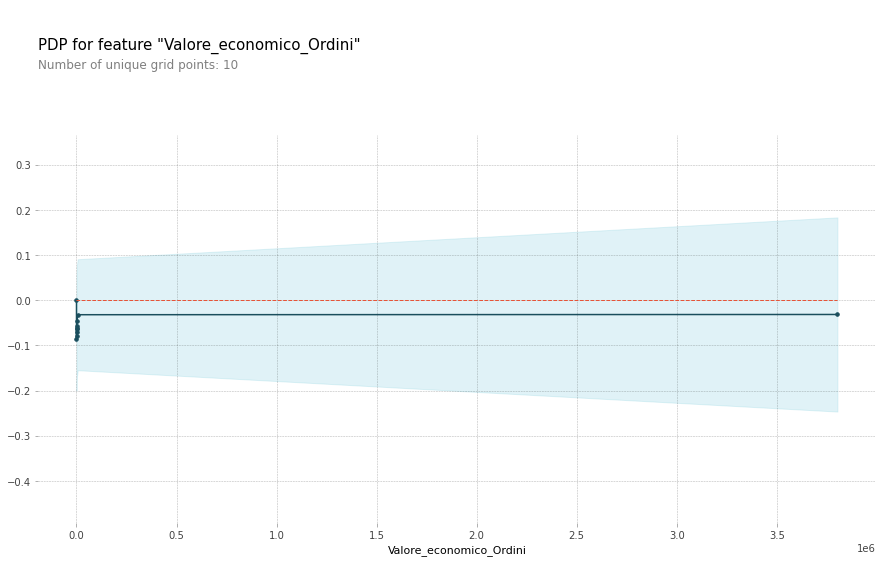

In [34]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots


pdp_ta = pdp.pdp_isolate(
    model=model,
    dataset=X,
    model_features=X.columns,
    feature="Valore_economico_Ordini",
)

pdp.pdp_plot(pdp_ta, "Valore_economico_Ordini")
plt.show()

## Shap values

Lo stesso problema (dato soprattutto dal fatto che l'encoding delle variabili e' fatto online).

Prova con mean encoding (ma a questo punto equivale a fare un barplot, ed il grafico si leggerebbe meglio)